In [181]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [182]:
ticker = 'AAPL'
df = yf.download(ticker, start='2018-01-01', end='2024-12-31', interval='1d')
df.dropna(inplace=True)
df.reset_index(inplace=True)

print("Data shape:", df.shape)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Data shape: (1760, 6)
Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2018-01-02  40.479832  40.489233  39.774854  39.986349  102223600
1      2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2      2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
3      2018-01-05  41.123714  41.210661  40.665479  40.757126   94640000
4      2018-01-08  40.970970  41.267060  40.872270  40.970970   82271200


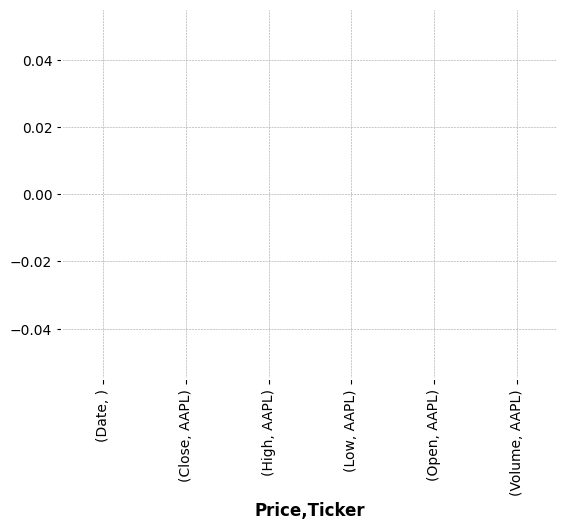

In [183]:

df.isna().sum().plot(kind="bar")

plt.show()



In [184]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1760 non-null   datetime64[ns]
 1   (Close, AAPL)   1760 non-null   float64       
 2   (High, AAPL)    1760 non-null   float64       
 3   (Low, AAPL)     1760 non-null   float64       
 4   (Open, AAPL)    1760 non-null   float64       
 5   (Volume, AAPL)  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 82.6 KB
None


In [185]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2018-01-02,40.479832,40.489233,39.774854,39.986349,102223600
1,2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600
2,2018-01-04,40.660782,40.764179,40.437540,40.545634,89738400
3,2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000
4,2018-01-08,40.970970,41.267060,40.872270,40.970970,82271200
...,...,...,...,...,...,...
1755,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
1756,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
1757,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


## changing tuples names to single string name   

In [186]:
df.columns = [col[0] if col[1] == '' else col[1] for col in df.columns]

df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

df


,Date,Close,High,Low,Open,Volume
0,2018-01-02,40.479832,40.489233,39.774854,39.986349,102223600
1,2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600
2,2018-01-04,40.660782,40.764179,40.437540,40.545634,89738400
3,2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000
4,2018-01-08,40.970970,41.267060,40.872270,40.970970,82271200
...,...,...,...,...,...,...
1755,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
1756,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
1757,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
1758,2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300


In [187]:
sns.set(style="whitegrid")

df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(float)

df['Daily Change %'] = df['Close'].pct_change() * 100
df['Volatility'] = df['High'] - df['Low']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

df = df.dropna(subset=['Daily Change %']).reset_index(drop=True) # dropping first row to remove Nan value 


# EDA 

In [188]:
df.head()



,Date,Close,High,Low,Open,Volume,Daily Change %,Volatility,Year,Month,DayOfWeek
0,2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600.0,-0.017396,0.608630,2018,1,Wednesday
1,2018-01-04,40.660782,40.764179,40.437540,40.545634,89738400.0,0.464490,0.326640,2018,1,Thursday
2,2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000.0,1.138524,0.545181,2018,1,Friday
3,2018-01-08,40.970970,41.267060,40.872270,40.970970,82271200.0,-0.371426,0.394790,2018,1,Monday
4,2018-01-09,40.966270,41.137814,40.750078,41.017969,86336000.0,-0.011471,0.387736,2018,1,Tuesday


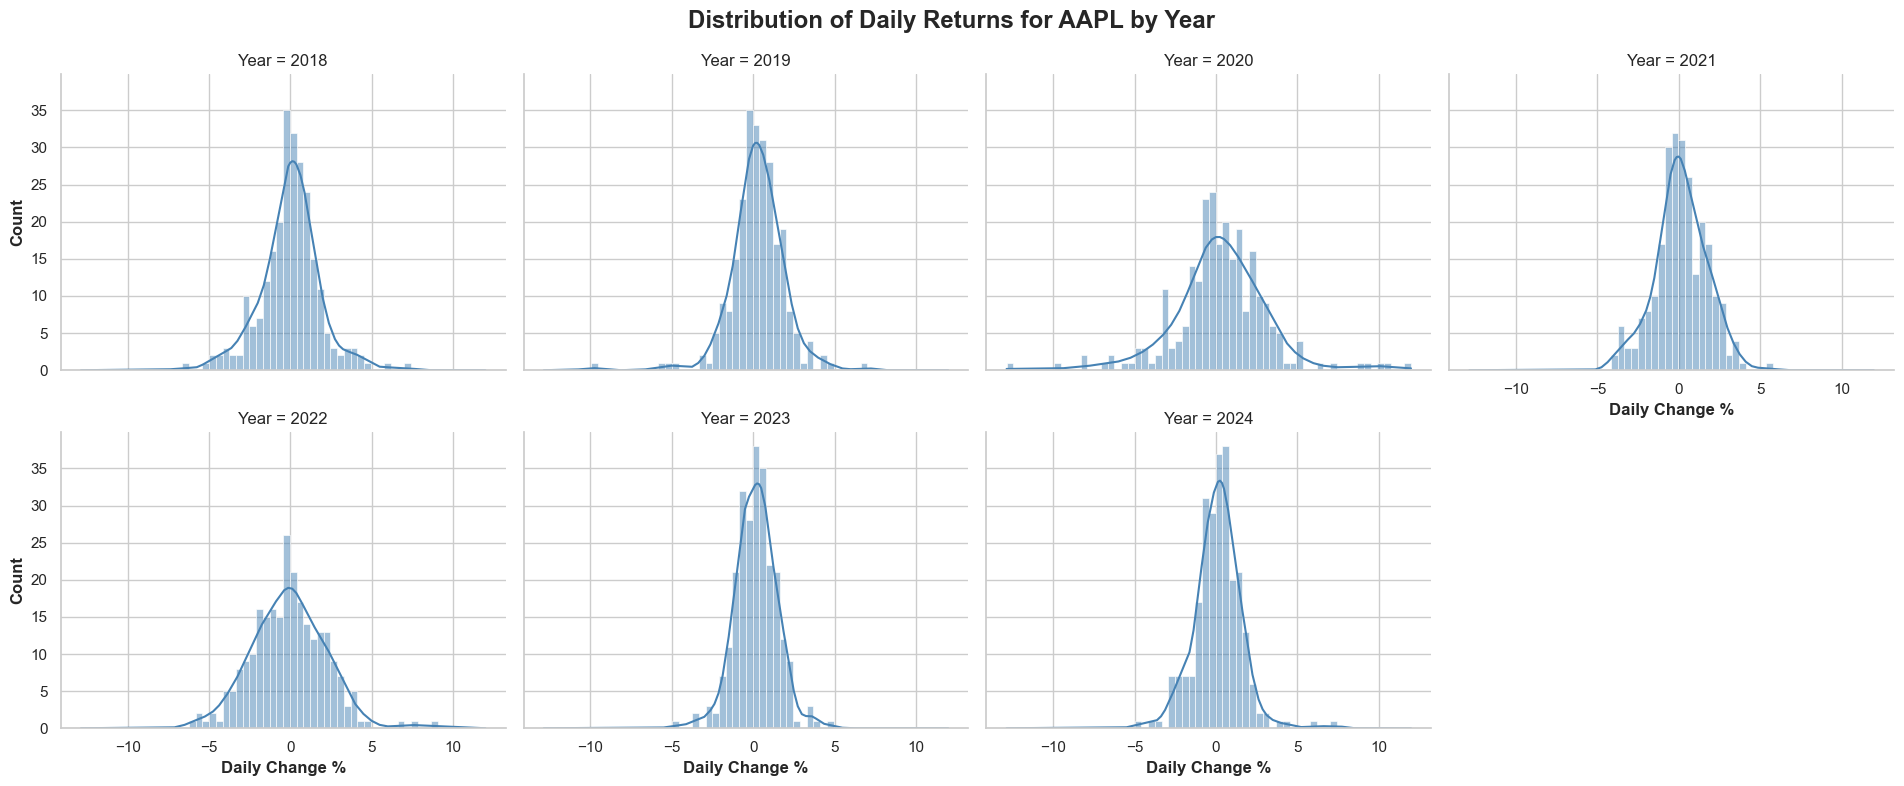

In [189]:

sns.displot(
    data=df,
    x="Daily Change %",
    col="Year",
    col_wrap=4,
    bins=60,
    kde=True,
    height=4,
    aspect=1.2,
    color="steelblue"
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribution of Daily Returns for AAPL by Year")
plt.show()

## Normality test for each year

In [190]:
from scipy.stats import shapiro

years = df['Year'].unique()
years.sort()

for year in years:
    sample = df[df['Year'] == year]['Daily Change %'].dropna()
    stat, p = shapiro(sample)
    print(f"Year {year}: stat={stat:.4f}, p-value={p:.4f} → ", end="")
    if p > 0.05:
        print("Fail to reject H0")
    else:
        print("Reject H0")


Year 2018: stat=0.9682, p-value=0.0000 → Reject H0
Year 2019: stat=0.9198, p-value=0.0000 → Reject H0
Year 2020: stat=0.9397, p-value=0.0000 → Reject H0
Year 2021: stat=0.9922, p-value=0.2010 → Fail to reject H0
Year 2022: stat=0.9868, p-value=0.0209 → Reject H0
Year 2023: stat=0.9843, p-value=0.0073 → Reject H0
Year 2024: stat=0.9559, p-value=0.0000 → Reject H0


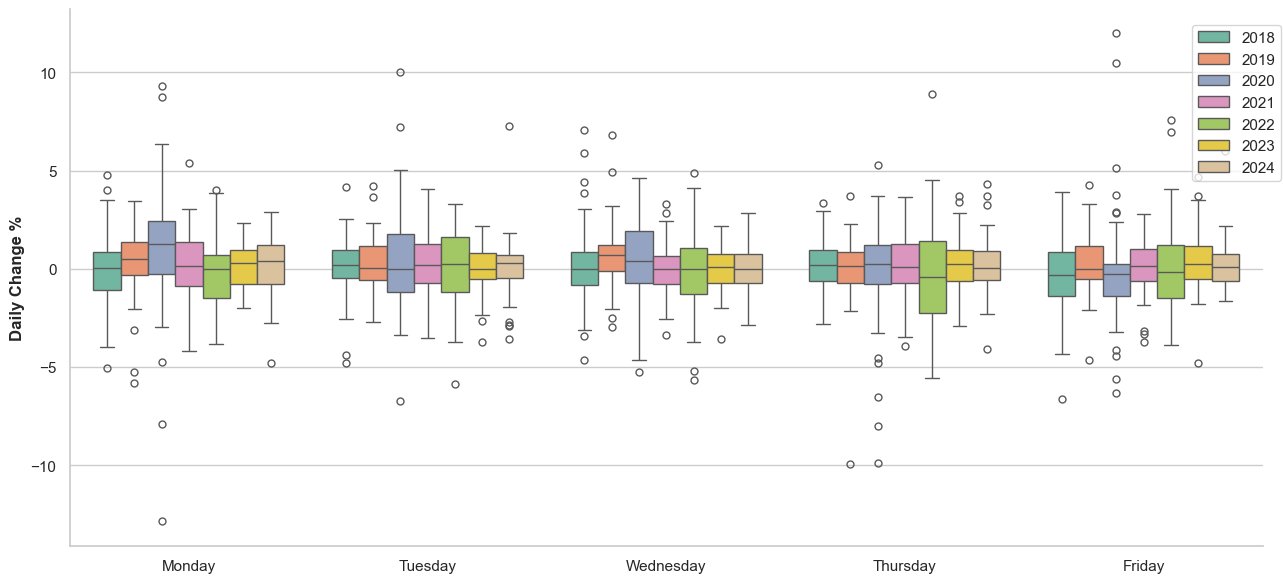

In [191]:
g = sns.catplot(
    data=df,
    x="DayOfWeek",
    y="Daily Change %",
    hue="Year",
    kind="box",
    height=6,
    aspect=2,
    palette="Set2",
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
)

g.set_titles("Boxplot dziennych zmian wg dnia tygodnia i roku")
g.set_axis_labels("", "Daily Change %")

g._legend.set_title("")  
g._legend.set_bbox_to_anchor((1, 0.8)) 
g._legend.set_frame_on(True)

plt.tight_layout()
plt.show()



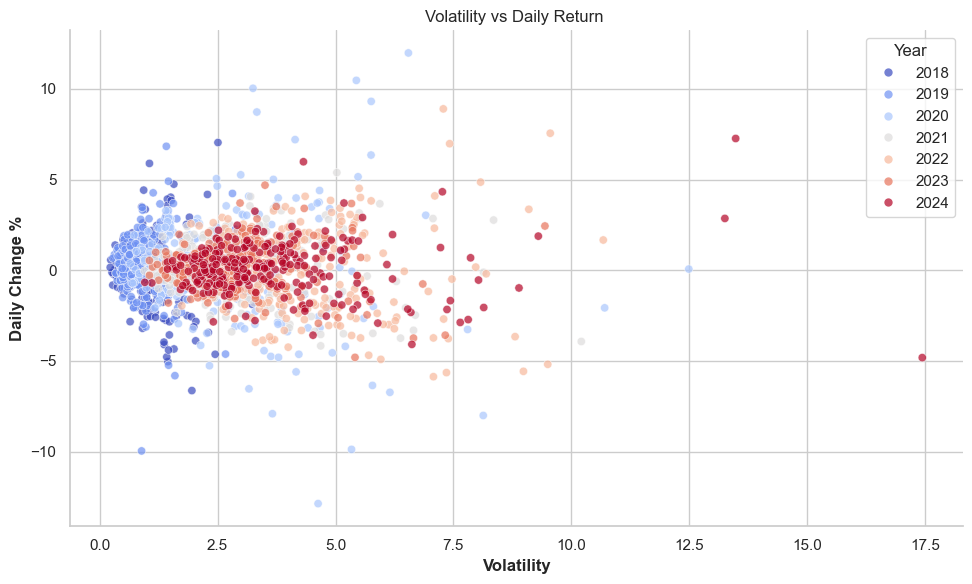

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.relplot(
    data=df,
    x="Volatility",
    y="Daily Change %",
    hue="Year",
    size=None,
    sizes=(10, 10),
    kind="scatter",
    height=6,
    aspect=1.5,
    palette="coolwarm",
    alpha=0.7,
    legend="full"  
)

plt.title("Volatility vs Daily Return ")
plt.tight_layout()

g._legend.remove()

handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles=handles, labels=labels, title='Year', loc='upper right', frameon=True)

plt.show()


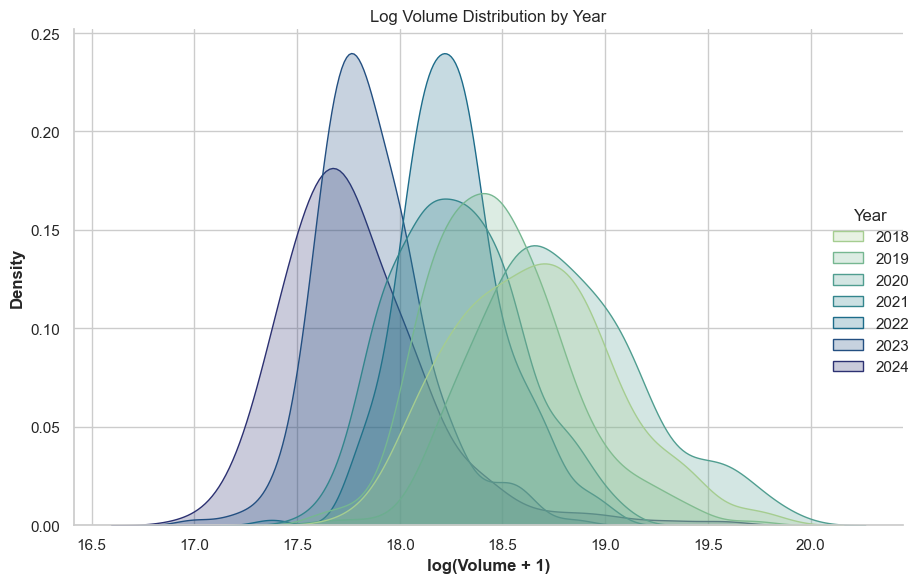

In [268]:
sns.displot(
    data=df,
    x=np.log1p(df["Volume"]),
    hue="Year",
    kind="kde",
    height=6,
    aspect=1.4,
    fill=True,
    palette="crest"
)
plt.title("Log Volume Distribution by Year")
plt.xlabel("log(Volume + 1)")
plt.tight_layout()
plt.show()


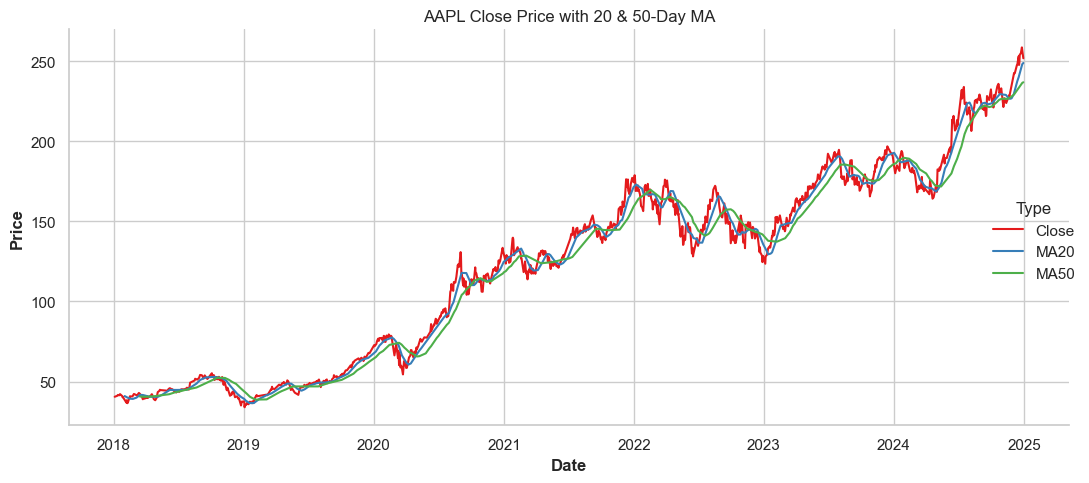

In [269]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

melted = df[['Date', 'Close', 'MA20', 'MA50']].melt(id_vars='Date', var_name='Type', value_name='Price')

sns.relplot(
    data=melted,
    kind="line",
    x="Date",
    y="Price",
    hue="Type",
    height=5,
    aspect=2,
    palette="Set1"
)
plt.title("AAPL Close Price with 20 & 50-Day MA")
plt.tight_layout()
plt.show()


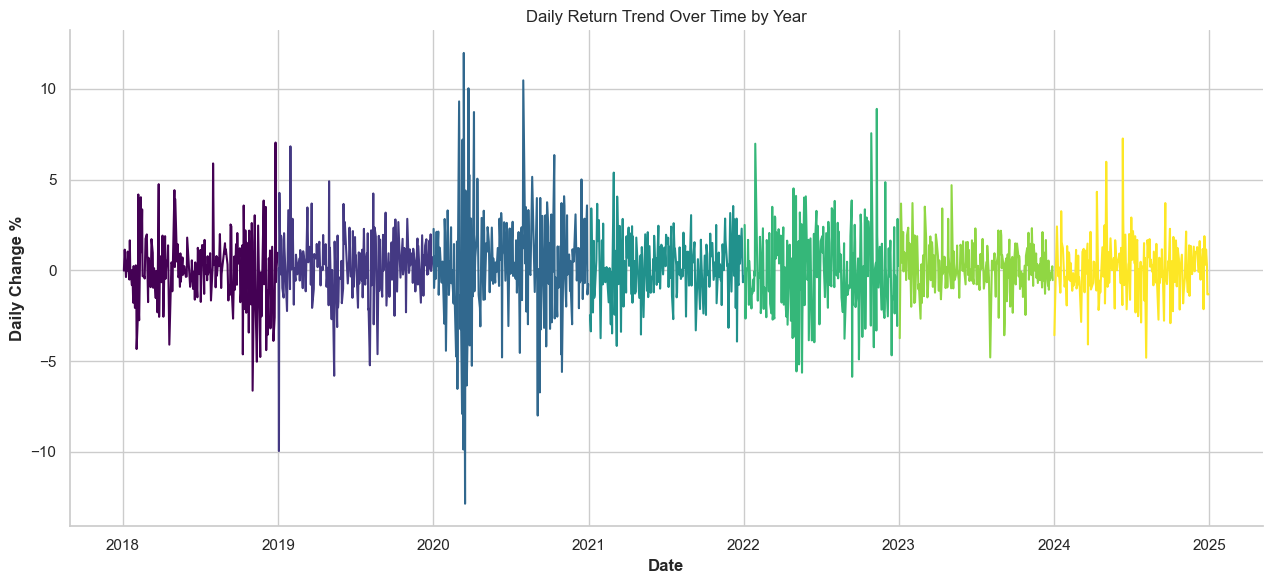

In [275]:

g = sns.relplot(
    data=df,
    x="Date",
    y="Daily Change %",
    kind="line",
    hue="Year",
    height=6,
    aspect=2,
    palette="viridis"
)

plt.title("Daily Return Trend Over Time by Year")
plt.tight_layout()

# Usuń legendę
g._legend.remove()

plt.show()


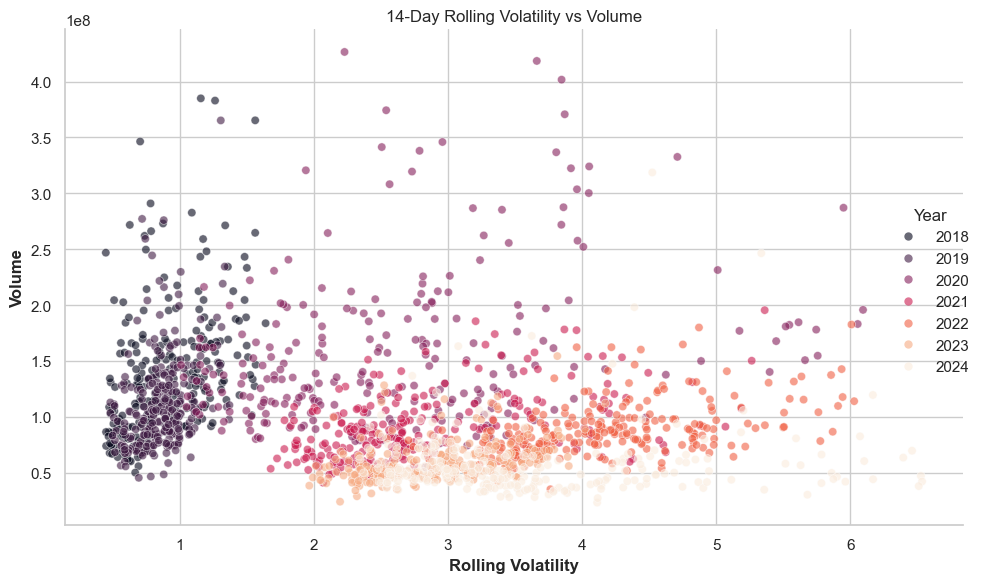

In [276]:
df['Rolling Volatility'] = df['Volatility'].rolling(14).mean()

sns.relplot(
    data=df,
    x="Rolling Volatility",
    y="Volume",
    hue="Year",
    kind="scatter",
    height=6,
    aspect=1.5,
    palette="rocket",
    alpha=0.6
)
plt.title("14-Day Rolling Volatility vs Volume")
plt.tight_layout()
plt.show()


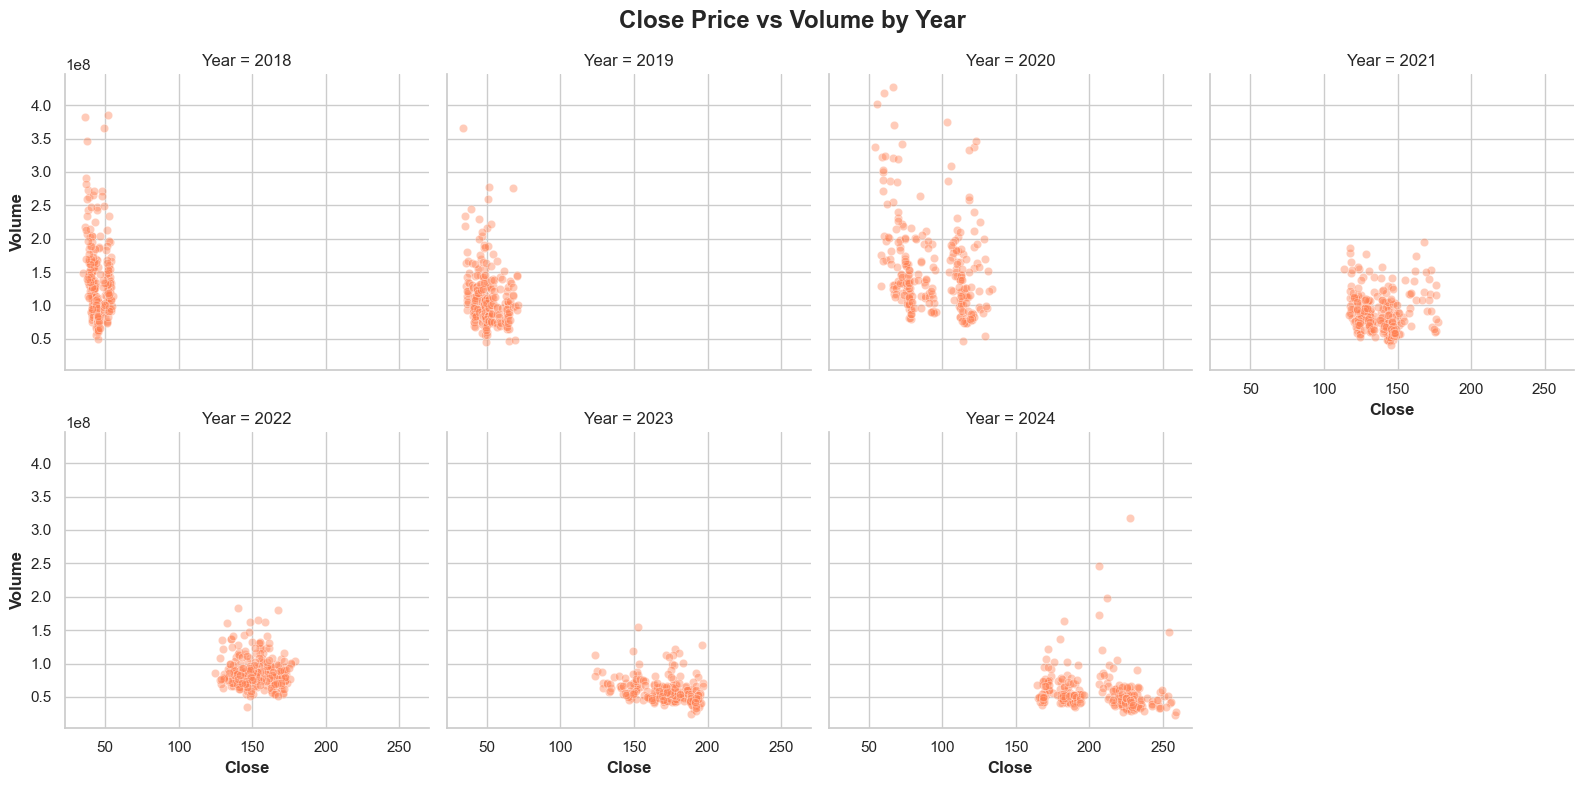

In [277]:
g = sns.FacetGrid(df, col="Year", col_wrap=4, height=4)
g.map(sns.scatterplot, "Close", "Volume", alpha=0.4, color="coral")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Close Price vs Volume by Year")
plt.show()


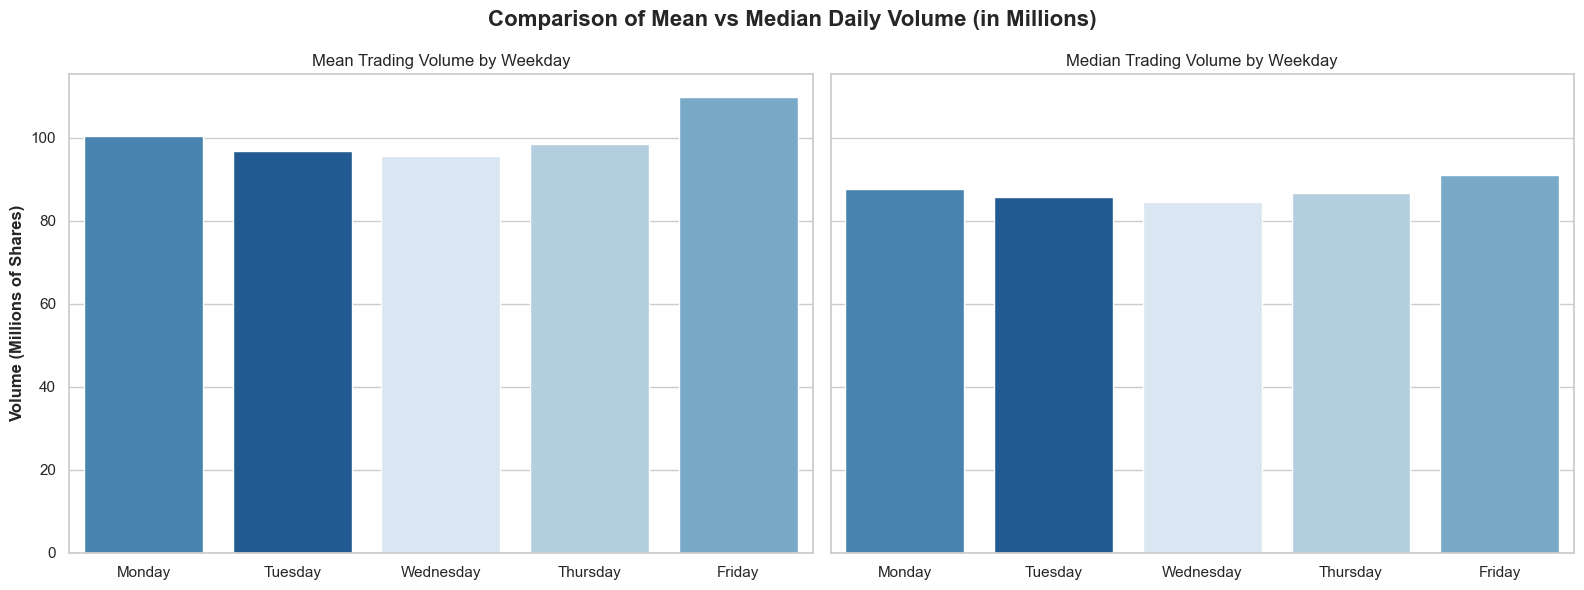

In [278]:
df['Volume_Mil'] = df['Volume'] / 1_000_000
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(
    data=df,
    x='DayOfWeek',
    y='Volume_Mil',
    estimator=np.mean,
    hue='DayOfWeek',
    palette='Blues',
    dodge=False,
    errorbar=None,
    order=weekday_order,
    ax=axes[0],
    legend=False
)
axes[0].set_title('Mean Trading Volume by Weekday')
axes[0].set_ylabel('Volume (Millions of Shares)')
axes[0].set_xlabel('')

sns.barplot(
    data=df,
    x='DayOfWeek',
    y='Volume_Mil',
    estimator=np.median,
    hue='DayOfWeek',
    palette='Blues',
    dodge=False,
    errorbar=None,
    order=weekday_order,
    ax=axes[1],
    legend=False
)
axes[1].set_title('Median Trading Volume by Weekday')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

plt.suptitle("Comparison of Mean vs Median Daily Volume (in Millions)", fontsize=16)
plt.tight_layout()
plt.show()
